<a href="https://colab.research.google.com/github/Asrar-Ahammad/Data-Science/blob/main/Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing Tensorflow
# !pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
# import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# divide the dataset into dependent and independent features
X = dataset.iloc[:,3:13]  #[rows,columns(column start:column end-1)]
y = dataset.iloc[:,13]

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
# Feature engineering
geography = pd.get_dummies(X['Geography'], drop_first = True) #drop_first is used to drop a column out of three features
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [ ]:
# concatenate these one hot encoded tables to X
X = X.drop(['Geography','Gender'],axis = 1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X,geography,gender],axis = 1)

In [ ]:
# splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # Why do we apply fit transform to train dataset only? interview question
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
# Creating Artificial Neural Network
# Tensorflow is integrated with keras which is a wrapper which enables to access the neural networks of tensorflow by calling a function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# Initialize the ANN
classifier = Sequential()

In [ ]:
# Adding Input layer
classifier.add(Dense(units = 11,activation = 'relu'))

In [ ]:
# Adding the first hidden layer
classifier.add(Dense(units = 7,activation = 'relu'))
classifier.add(Dropout(0.3))

In [ ]:
# Adding second hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dropout(0.3))

In [ ]:
# Adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# To give specific learning rate
import tensorflow
opt  = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [ ]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4182 - accuracy: 0.8324 - val_loss: 0.3790 - val_accuracy: 0.8482
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3906 - accuracy: 0.8427 - val_loss: 0.3903 - val_accuracy: 0.8247
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3697 - accuracy: 0.8451 - val_loss: 0.3745 - val_accuracy: 0.8455
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3768 - accuracy: 0.8405 - val_loss: 0.3690 - val_accuracy: 0.8466
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3712 - accuracy: 0.8500 - val_loss: 0.3699 - val_accuracy: 0.8459
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3731 - accuracy: 0.8462 - val_loss: 0.3704 - val_accuracy: 0.8432
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3730 - accuracy: 0.8444 - val_loss: 0.3662 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

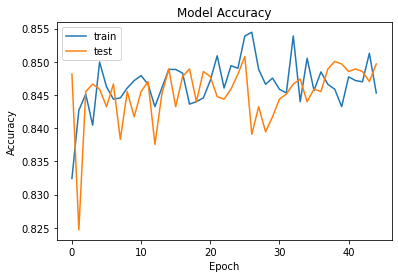

In [ ]:
# Summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

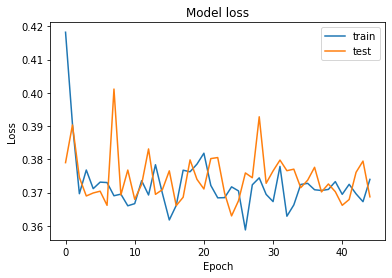

In [ ]:
# Plotting for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'])
plt.show()

In [ ]:
# Part 3 Prediction
#Predicting the test results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
# Make the confusio matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1559,   36],
       [ 240,  165]])

In [ ]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [ ]:
score

0.862

In [ ]:
# Get the weigths
classifier.get_weights()